In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as  plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore") 

In [3]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# finding shape 
customer_data.shape

(200, 5)

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


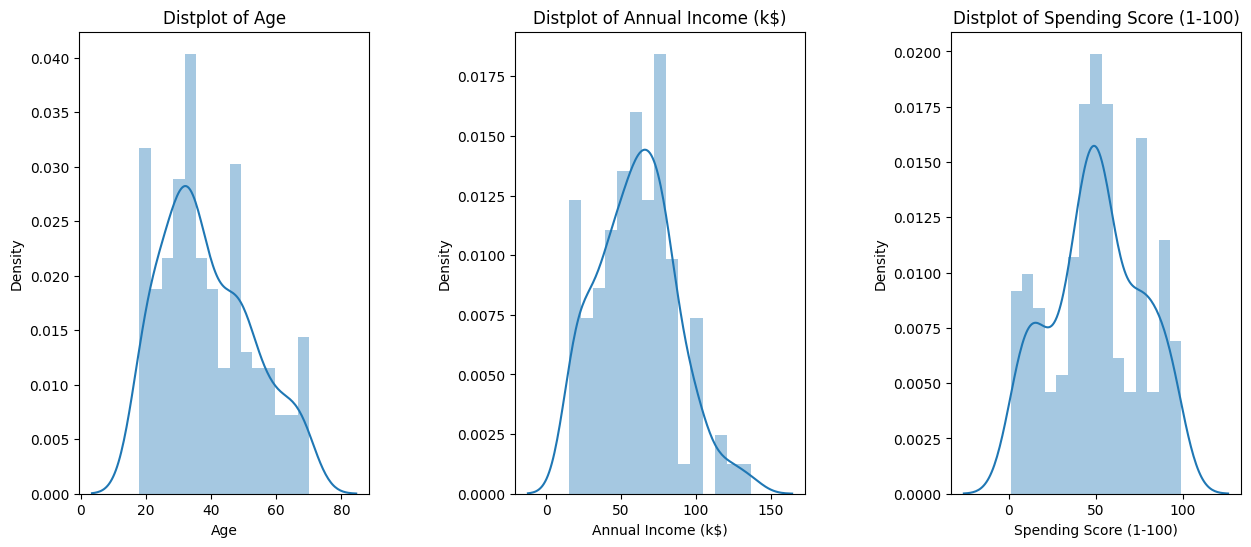

In [8]:
plt.figure(1 ,figsize = (15,6))
n = 0
for x in ['Age' ,'Annual Income (k$)', 'Spending Score (1-100)']:
    n  = n + 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(customer_data[x] ,bins =15)
    plt.title('Distplot of {}'.format(x))
plt.show()


In [9]:
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [10]:
label_encoder = preprocessing.LabelEncoder()
customer_data['Gender'] = label_encoder.fit_transform(customer_data['Gender'])
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


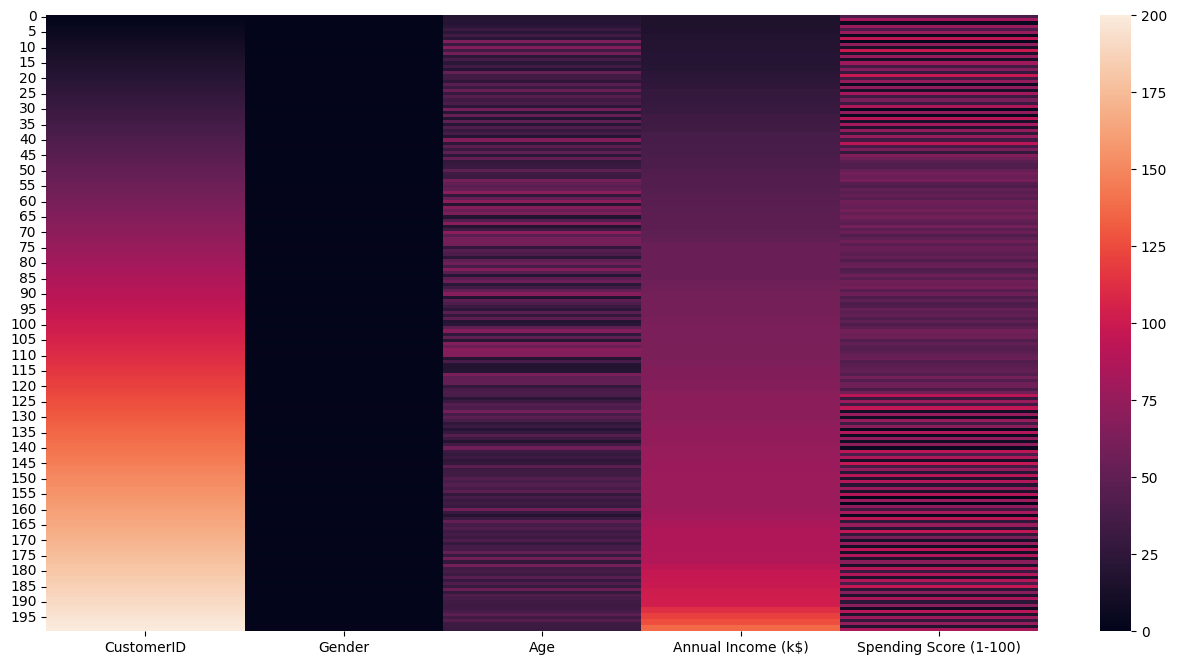

In [11]:
plt.figure(1 ,figsize = (16,8 ))
sns.heatmap(customer_data)
plt.show()

In [30]:
X = customer_data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [27]:
from sklearn.cluster import KMeans
wcss = []


for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init ='k-means++', max_iter = 300, n_init = 10,
                   random_state = 0)
    kmeans.fit(X)
    # .inertia_ gives wcss value (Within Cluster Sum of Squares)
    wcss.append(kmeans.inertia_)

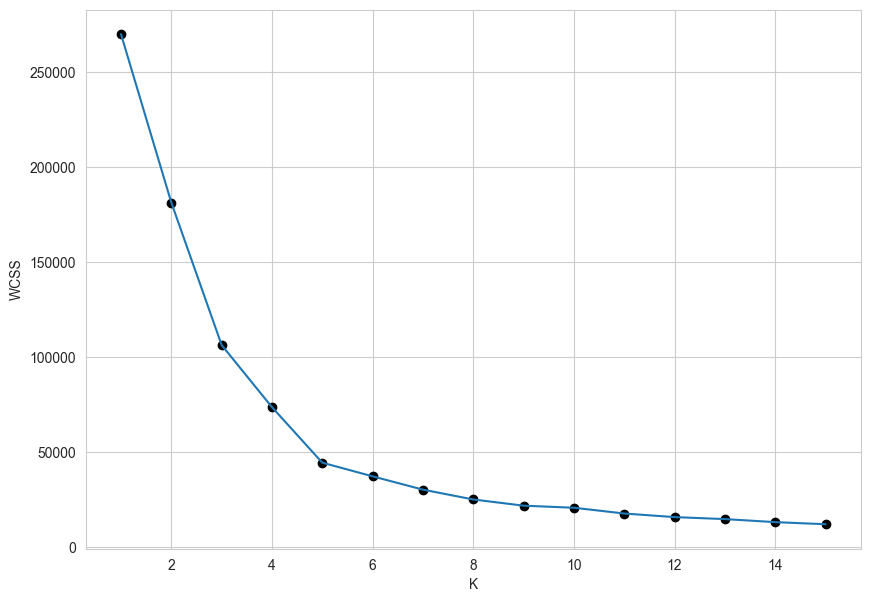

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,7))
plt.plot(range(1,16), wcss)
plt.scatter(range(1,16), wcss, color = 'k', marker = 'o')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

#### plotting dendrogram

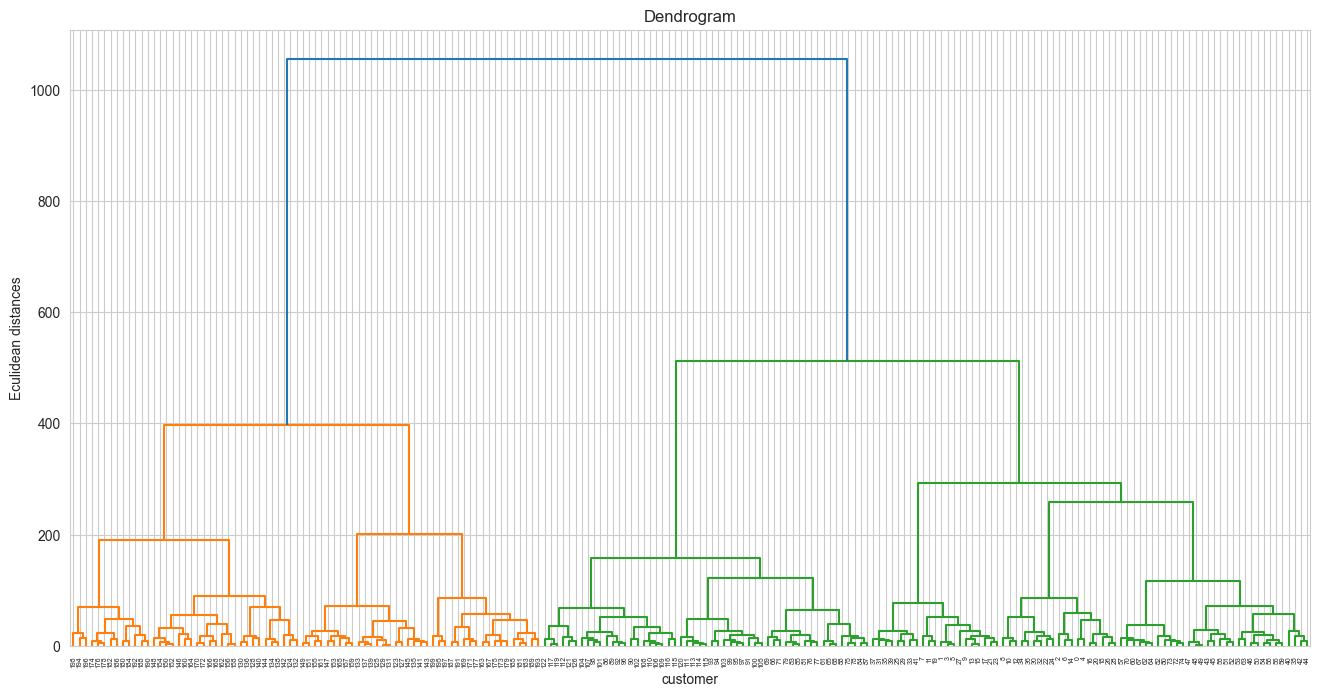

In [14]:
plt.figure(1 ,figsize = (16,8))
dendrogram = sch.dendrogram(sch.linkage(customer_data , method = "ward"))

plt.title('Dendrogram')
plt.xlabel('customer')
plt.ylabel('Eculidean distances')
plt.show()

In [15]:
hc = AgglomerativeClustering(n_clusters=5 , affinity= 'euclidean',
                             linkage = 'average')
y_hc = hc.fit_predict(customer_data)
y_hc

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [32]:
customer_data['cluster'] = pd.DataFrame(y_hc)
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clsuter,cluster
0,1,1,19,15,39,3,3
1,2,1,21,15,81,4,4
2,3,0,20,16,6,3,3
3,4,0,23,16,77,4,4
4,5,0,31,17,40,3,3
...,...,...,...,...,...,...,...
195,196,0,35,120,79,1,1
196,197,0,45,126,28,0,0
197,198,1,32,126,74,1,1
198,199,1,32,137,18,0,0


In [38]:
plot_in_h_dim = go.Scatter3d(
    x= customer_data['Age'],
    y= customer_data['Spending Score (1-100)'],
    z= customer_data['Annual Income (k$)'],
    mode = 'markers',
    marker = dict(
        color = customer_data['cluster'],
        size = 10,
        line = dict(
            color = customer_data['cluster'],
            width = 12
        ),
        opacity = 0.9
    )
)

data =[plot_in_h_dim]
layout = go.Layout(
    title = "Clustering using agglomerative clustering",
    scene = dict(
        xaxis = dict(title  = 'Age'),
        yaxis = dict(title  = 'Spending Score'),
        zaxis = dict(title  = 'Annual Income')
    )
)
fig = go.Figure(data =data , layout = layout)
py.offline.iplot(fig)



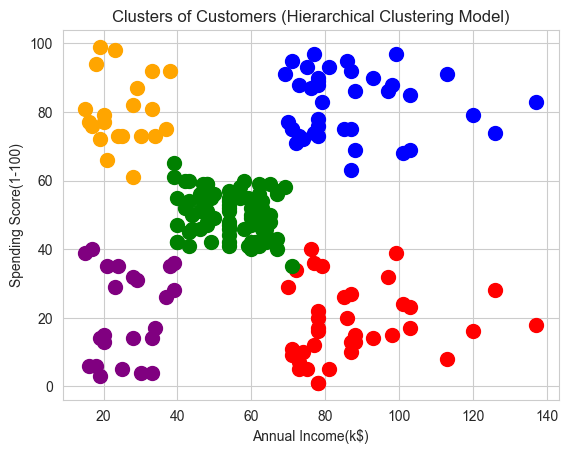

In [31]:
# X = customer_data.iloc[:, [3,4]].values
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='orange', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()